# 1.2d Geometric random walk

# importing shit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
import scipy

# defining geometric random walk function

In [78]:
μ = 0
σ = 0.2
N = 100

def GRW(μ, σ, N):
    X = np.random.randn(N)*σ + μ
    Y = np.cumsum(X)
    Y[0] = 0
    Z = np.exp(Y)
    return Z



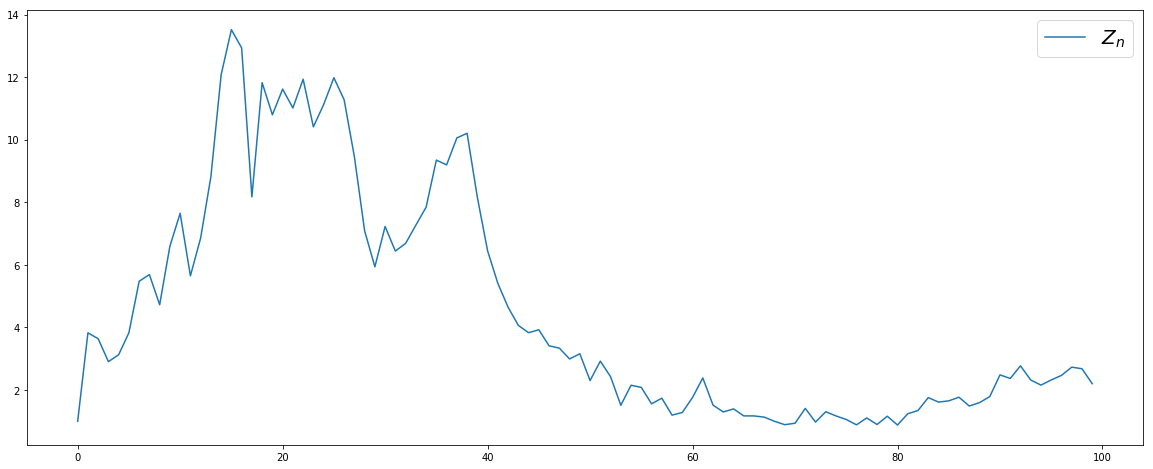

In [79]:
plt.figure(figsize = (20, 8))
plt.plot(range(N), GRW(0, 0.2, 100), label = r'$Z_n$')
plt.legend(fontsize = 20)

# calculating empirical average

In [80]:
def empav(realisations, μ, σ, N):
    raw = np.zeros(shape = (N, realisations))
    for i in range(realisations):
        raw[:, i] = GRW(μ, σ, N)
    averages = np.zeros(N)
    for i in range(N):
        averages[i] = (1/realisations)*np.sum(raw[i, :])
    deviation = np.std(raw, axis = 1)
    return [raw, averages, deviation]

# plotting empirical averages as a function of time n

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 <a list of 6 Text yticklabel objects>)

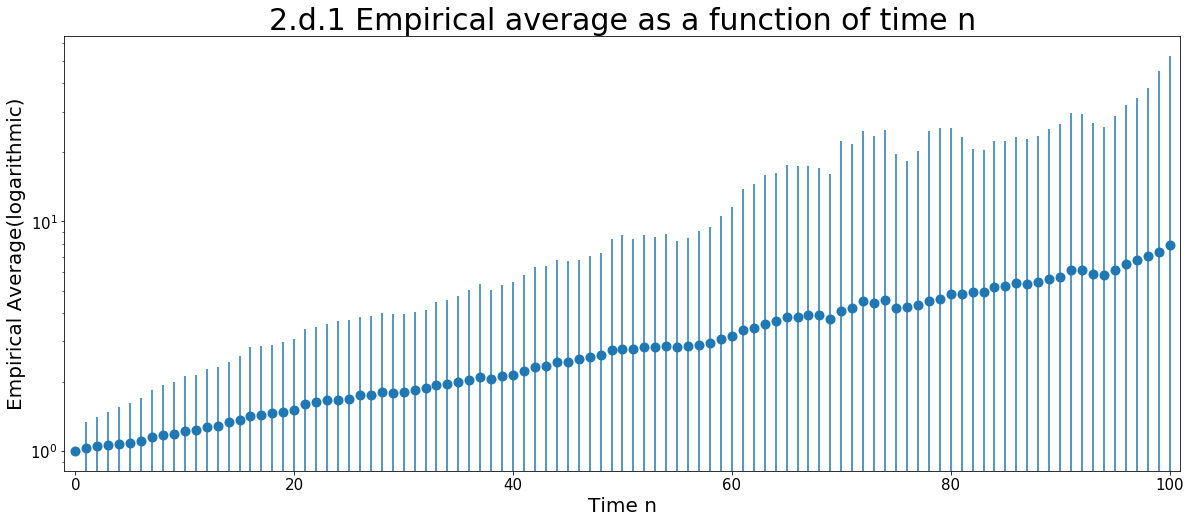

In [114]:
realisations = 500
μ = 0
σ = 0.2
N = 101
raw, empaverages, deviation = empav(realisations, μ, σ, N)
plt.figure(figsize = (20, 8))
plt.errorbar(range(N), y = empaverages, yerr = deviation, fmt = 'o', mew = 4) #, label = "Empirical Averages with Error Bars")
plt.yscale("log")
plt.xlim([-1, 101])
plt.xlabel("Time n", fontsize = 20)
plt.ylabel("Empirical Average(logarithmic)", fontsize = 20)
plt.title("2.d.1 Empirical average as a function of time n", fontsize = 30)
# plt.legend(fontsize = 20, loc = "upper left")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# theoretical pdf

In [82]:
def pdfz(μ, σ, n, spaces):
    zs = np.linspace(-1, n, spaces)
#     print(zs)
    thepdf = np.zeros(len(zs))
    thepdf = [(np.exp(-(np.log(i)-n*μ)**2/(2*n*σ*σ)))/(i * σ * np.sqrt(2*n*np.pi)) for i in zs]
    return [zs, thepdf]


# at time n = 10
# produce box plot

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]),
 <a list of 11 Text yticklabel objects>)

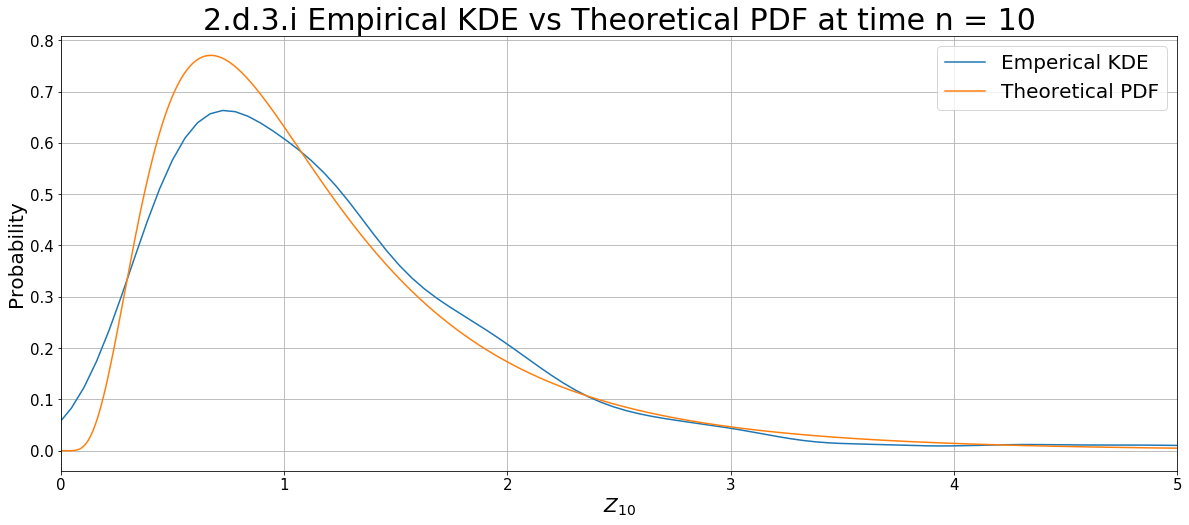

In [116]:
μ = 0
σ = 0.2
n = 10
spaces = 1000
realisations = 500
raw_10, empaverages_10, deviation_10 = empav(realisations, μ, σ, n)
data_10 = raw_10[n-1, :]
plt.figure(figsize = (20,8))
sns.kdeplot(data_10, label = "Emperical KDE")
zs_10, thepdf_10 = pdfz(μ, σ, n, spaces)
plt.plot(zs_10, thepdf_10, label = "Theoretical PDF")
plt.legend(fontsize = 20)
plt.xlim([0, 5])
plt.xlabel(r'$Z_{10}$', fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.title("2.d.3.i Empirical KDE vs Theoretical PDF at time n = 10", fontsize = 30)
plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# at time n = 100
# produce box plot

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text yticklabel objects>)

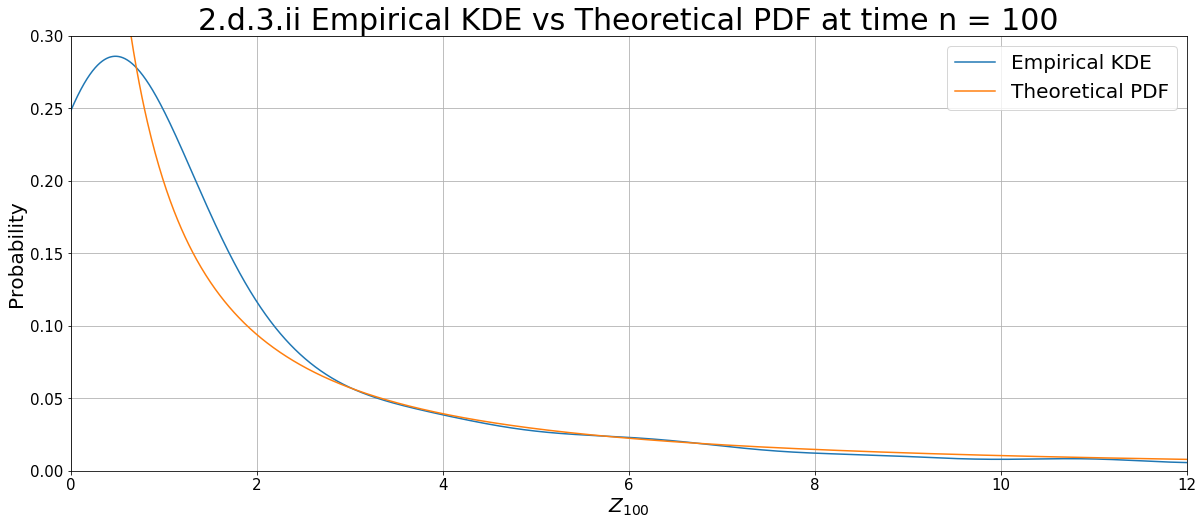

In [101]:
μ = 0
σ = 0.2
n = 100
spaces = 10000
realisations = 500
raw_100, empaverages_100, deviation_100 = empav(realisations, μ, σ, n)
data_100 = raw_100[n-1, :]
plt.figure(figsize = (20,8))
sns.kdeplot(data_100, label = "Empirical KDE", gridsize = 1000000)
zs_100, thepdf_100 = pdfz(μ, σ, n, spaces)
plt.plot(zs_100, thepdf_100, label = "Theoretical PDF")
plt.xlim([0, 12])
plt.ylim([0, 0.3])
plt.legend(fontsize = 20)
# plt.yscale("log")
plt.xlabel(r'$Z_{100}$', fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.title("2.d.3.ii Empirical KDE vs Theoretical PDF at time n = 100", fontsize = 30)
plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
        1.e+04]), <a list of 9 Text yticklabel objects>)

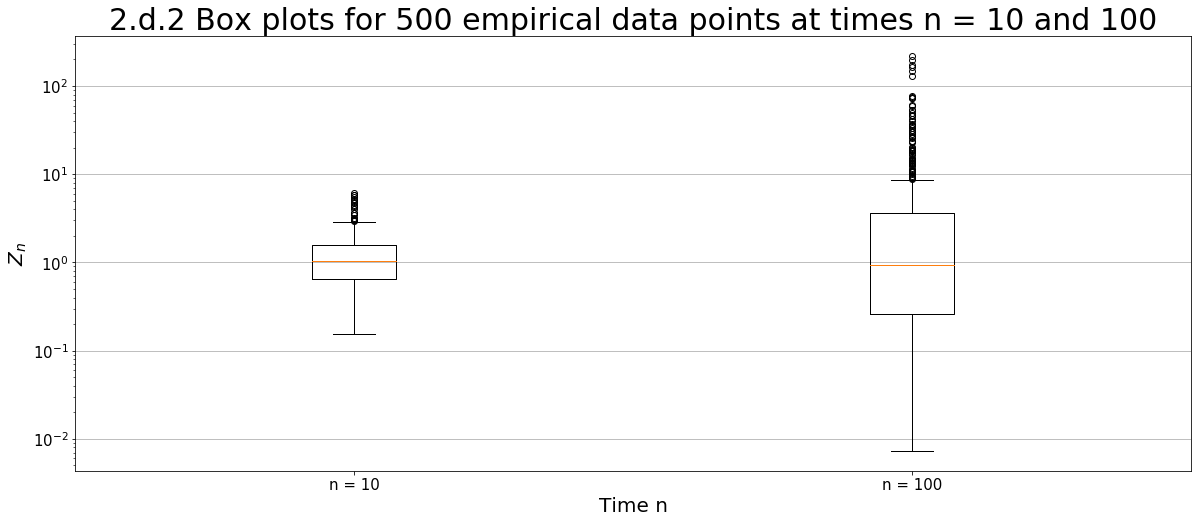

In [117]:
plt.figure(figsize = (20, 8))
plt.boxplot([data_10, data_100])
plt.yscale("log")
plt.title("2.d.2 Box plots for 500 empirical data points at times n = 10 and 100",
         fontsize = 30)
plt.xticks([1, 2], ["n = 10", "n = 100"])
plt.xlabel("Time n", fontsize = 20)
plt.ylabel(r'$Z_n$', fontsize = 20)
plt.grid(axis = 'y')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# maybe do a local one to show the fluctuations 

# ergodic average for single realisation

In [127]:
def ergav(μ, σ, N):
    ergaverages = np.zeros(N+1)
    ergcumsum = np.cumsum(GRW(μ, σ, N+1))
    for i in range(0, N+1):
        ergaverages[i] = ergcumsum[i] / (i+1)
#     return ergaverages
    plt.figure(figsize = (20, 8))
    plt.plot(ergaverages) #, label = 'Ergodic average up to N = 100')
#     plt.legend(fontsize = 20)
    plt.title("2.d.4 Ergodic Average up to N = 100", fontsize = 30)
    plt.xlabel("Time n", fontsize = 20)
    plt.ylabel("Ergodic Average", fontsize = 20)
#     plt.grid()
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

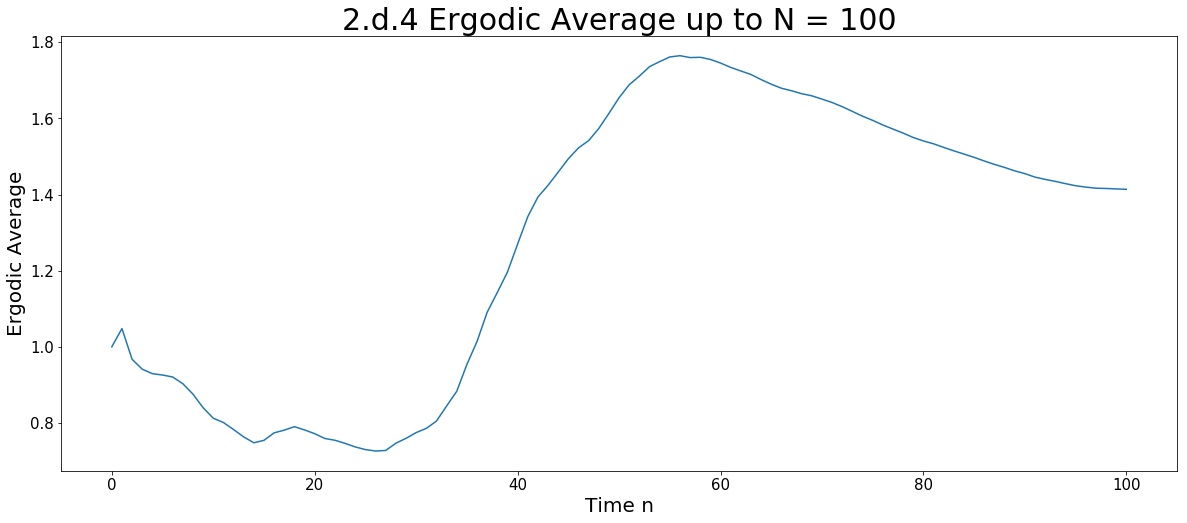

In [131]:
ergav(0, 0.2, 100)

# 1.2e

# function for plotting empirical tail

In [90]:
def emptail(σ, μ, n, realisations):
    raw = np.zeros(realisations)
    for i in range(realisations):
        raw[i] = GRW(μ, σ, n)[n-1]
    x = np.sort(raw)
    y = np.arange(1, len(x)+1) / len(x)
    return [x, y]

# function for generating cdf and theoretical tail

In [110]:
def thecdf(μ, σ, n, spaces):
    zs = np.linspace(0, 100, spaces)
    thecdf = np.zeros(len(zs))
    thecdf = np.asarray([1/2 + (1/2) * scipy.special.erf((np.log(i)-n*μ) / (np.sqrt(2*n)*σ)) for i in zs])
    return [zs, thecdf]

In [92]:
def thetail(μ, σ, n, spaces):
    zs, a = thecdf(μ, σ, n, spaces)
    thetail = 1 - a
    return [zs, thetail]

# empirical tail for n = 10, no longer used

Text(0.5, 1.0, '2.e Empirical Tail vs Theoretical Distribution at n = 10')

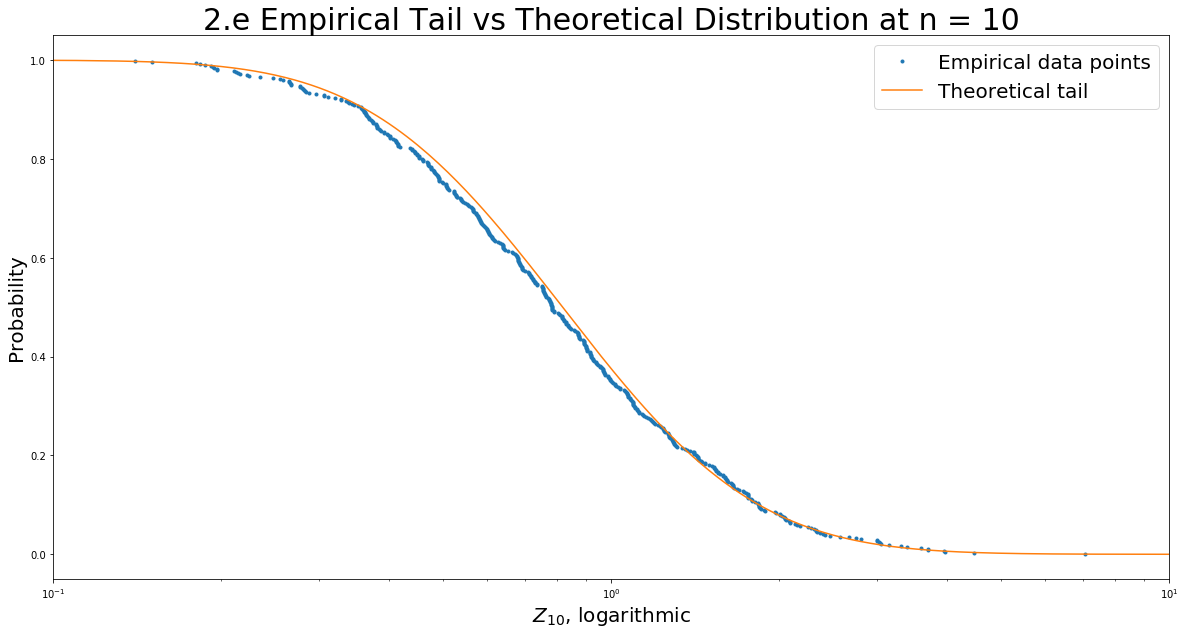

In [132]:
σ = 0.2
μ = -0.02
n = 10
realisations = 500
steps = 10000

empx, empy = emptail(σ, μ, n, realisations)
thex, they = thetail(μ, σ, n, steps)

plt.figure(figsize = (20, 10))
plt.plot(empx, 1-empy, marker = '.', linestyle = 'none', 
         label = "Empirical data points")
plt.plot(thex, they, label = "Theoretical tail")
plt.xscale("log")
plt.xlim([10**-1, 10])
plt.legend(fontsize = 20)
plt.xlabel(r'$Z_{10}$, logarithmic', fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.title("2.e Empirical Tail vs Theoretical Distribution at n = 10", fontsize = 30)

# empirical tail for n = 100, no longer used

(0.00031622776601683794, 100)

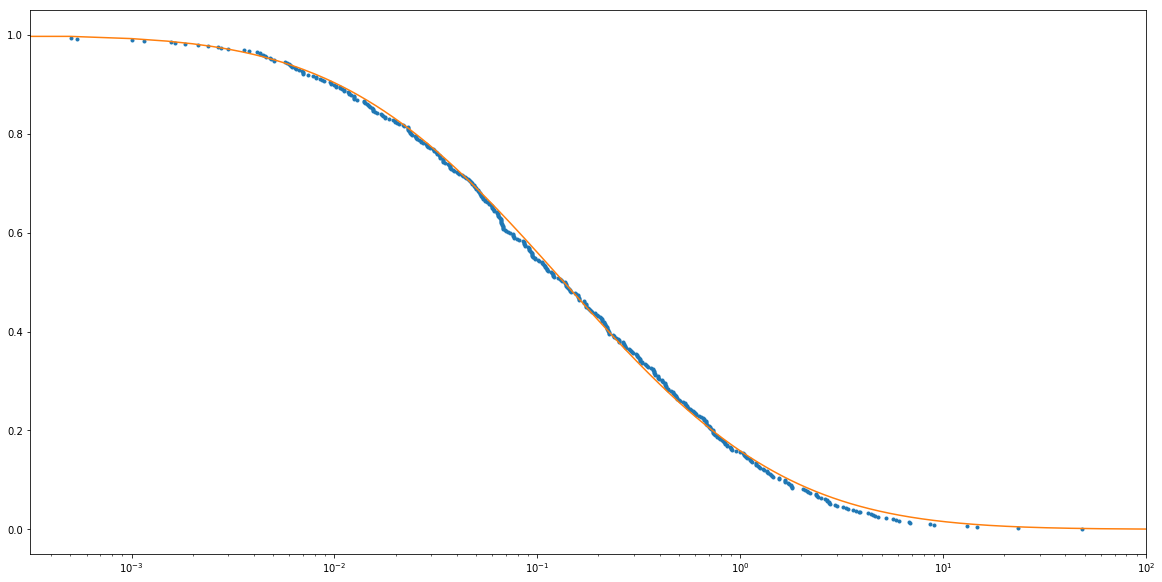

In [99]:
σ = 0.2
μ = -0.02
n = 100
realisations = 500
steps = 200000

empx, empy = emptail(σ, μ, n, realisations)
thex, they = thetail(μ, σ, n, steps)

plt.figure(figsize = (20, 10))
plt.plot(empx, 1-empy, marker = '.', linestyle = 'none')
plt.plot(thex, they)
plt.xscale("log")
plt.xlim([10**-3.5, 10**2])

# empirical and theoretical at both 100 and 10

Text(0.5, 1.0, '2.e.1 Empirical Tail vs Theoretical Distribution at n = 10 and 100')

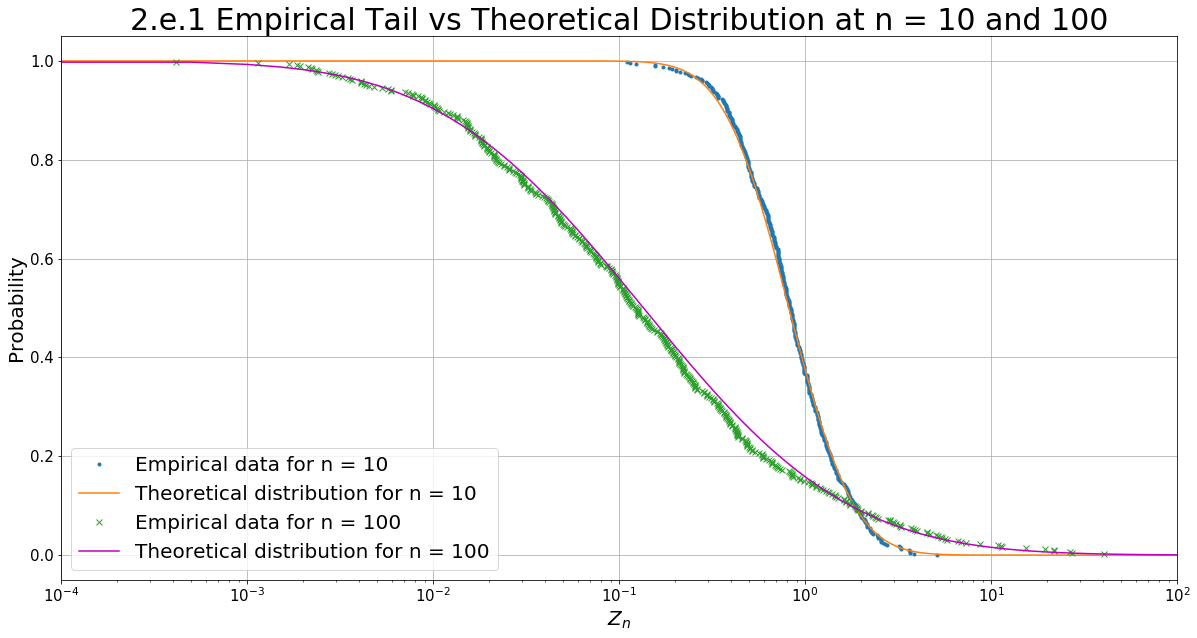

In [126]:
σ = 0.2
μ = -0.02
n = 10
realisations = 500
steps = 10000

empx, empy = emptail(σ, μ, n, realisations)
thex, they = thetail(μ, σ, n, steps)

plt.figure(figsize = (20, 10))
plt.plot(empx, 1-empy, marker = '.', linestyle = 'none', 
         label = "Empirical data for n = 10")
plt.plot(thex, they, label = "Theoretical distribution for n = 10")
# plt.xscale("log")
# plt.xlim([10**-1, 10])
# plt.legend(fontsize = 20)
# plt.xlabel(r'$Z_{10}$, logarithmic', fontsize = 20)
# plt.ylabel("Probability", fontsize = 20)

σ = 0.2
μ = -0.02
n = 100
realisations = 500
steps = 200000

empx, empy = emptail(σ, μ, n, realisations)
thex, they = thetail(μ, σ, n, steps)

# plt.figure(figsize = (20, 10))
plt.plot(empx, 1-empy, marker = 'x', linestyle = 'none', label = "Empirical data for n = 100")
plt.plot(thex, they, color = 'm', label = "Theoretical distribution for n = 100")
plt.xscale("log")
plt.xlim([10**-4, 10**2])
plt.grid()
# plt.xticks([1])
plt.legend(fontsize = 20, loc = "lower left")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r"$Z_n$", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.title("2.e.1 Empirical Tail vs Theoretical Distribution at n = 10 and 100", fontsize = 30)